# **Importing the libraries**

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer

# **Load Dataset**

In [3]:
data = pd.read_csv('/content/sample_data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Dimensions of the Dataset
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Use LabelEncoder encoder to transform categorical features into numerical features**

In [7]:
# Use LabelEncoder encoder to transform categorical features into numerical features
label = LabelEncoder()
data['Pregnancies'] = label.fit_transform(data['Pregnancies'])
data['Glucose'] = label.fit_transform(data['Glucose'])
data['BloodPressure'] = label.fit_transform(data['BloodPressure'])
data['SkinThickness'] = label.fit_transform(data['SkinThickness'])
data['Insulin'] = label.fit_transform(data['Insulin'])
data['BMI'] = label.fit_transform(data['BMI'])
data['DiabetesPedigreeFunction'] = label.fit_transform(data['DiabetesPedigreeFunction'])
data['Age'] = label.fit_transform(data['Age'])
data['Outcome'] = label.fit_transform(data['Outcome'])

# **Slicing data**

In [38]:
# Slicing data
X = data.iloc[:, [0, 2]].values
y = data.iloc[:, -1].values
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


# **Declare feature vector and target variable and droping 'Age' for more accuracy.**

In [51]:
# declare feature vector and target variable
X = data.drop(['Age'], axis=1)
y = data['Outcome']

# **Split the data into tarin and test**

In [52]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(614, 8)
Shape train labels :(614,)
Shape test features :(154, 8)
Shape test labels :(154,)


# **Instantiate the DecisionTreeClassifier model**

In [54]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='log_loss',random_state=0,n_estimators=10,max_depth=5)
model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=10,
                       random_state=0)

# **View the feature scores**

In [55]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

7    0.819013
1    0.063890
5    0.040619
0    0.031988
3    0.015239
6    0.015050
2    0.007633
4    0.006567
dtype: float64

# **Let's check the accuracy**

In [56]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **Split the data into training and test sets for BernoulliNB**

In [57]:
#Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# **Training the Naive Bayes model of BernoulliNB training set**

In [59]:
# Training the Naive Bayes model on the Training set
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

# **Predicting the Test set results**

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Predicted Test Results : \n",y_pred)

Predicted Test Results : 
 [0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


# **Making the Confusion Matrix**

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
print("Model Accuracy : ",ac)
print("Model Accuracy in %: ",ac*100,"%")
model_score = model.score(X_test, y_test)
print('Model Score : ',model_score)
print('Model Score in %: ',model_score*100,"%")
cm = confusion_matrix(y_test, y_pred)
print("Model Confusion Matrix : ")
print(cm)


Model Accuracy :  1.0
Model Accuracy in %:  100.0 %
Model Score :  1.0
Model Score in %:  100.0 %
Model Confusion Matrix : 
[[147   0]
 [  0  84]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **Get the confusion matrix**

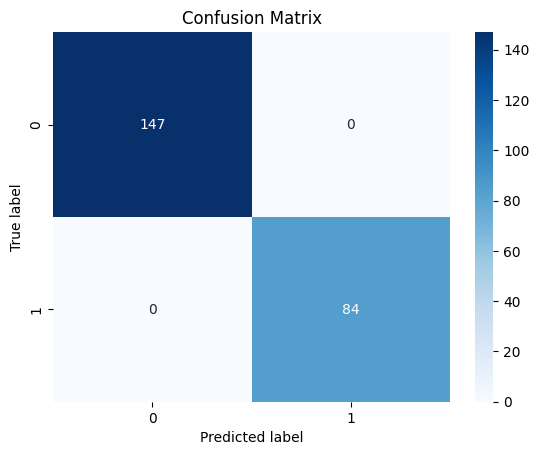

In [62]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()